In [1]:
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_22269/1361632938.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


           x          y  cluster
0   4.965288   7.720169      0.0
1   5.060230   5.827183      0.0
2   2.536582   3.356240      0.0
3   1.310908   5.191702      0.0
4   5.346448   4.684731      0.0
5   2.698896   2.005113      0.0
6   5.293072   4.763181      0.0
7   4.110486   4.348400      0.0
8   6.186454  12.462103      0.0
9   6.158596   6.088951      0.0
10  2.986503   2.328751      0.0
11  7.765454  11.848215      0.0
12  5.184634   5.515035      0.0
13  5.515766  12.849602      0.0
14  2.398293   1.498243      0.0
15  5.073070  12.812862      0.0
16  3.392517   4.062175      0.0
17  5.292331  11.307090      0.0
18  5.227460   6.053802      0.0
19  7.190456   4.153206      0.0


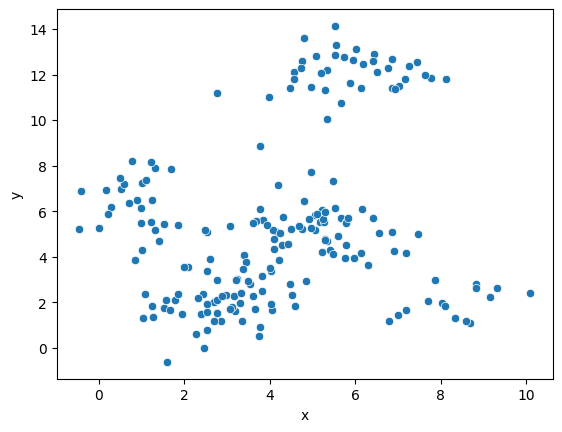

In [2]:
import pandas as pd
import seaborn as sns

np.random.seed(42)


x1 = np.random.normal(loc=3, scale=1, size=55)
y1 = np.random.normal(loc=2, scale=1, size=55)
x2 = np.random.normal(loc=5, scale=1, size=63)
y2 = np.random.normal(loc=5, scale=1, size=63)
x3 = np.random.normal(loc=6, scale=1, size=38)
y3 = np.random.normal(loc=12, scale=1, size=38)
x4 = np.random.normal(loc=8, scale=1, size=15)
y4 = np.random.normal(loc=2, scale=1, size=15)
x5 = np.random.normal(loc=1, scale=1, size=29)
y5 = np.random.normal(loc=6, scale=1, size=29)
x = np.concatenate([x1, x2, x3, x4, x5])
y = np.concatenate([y1, y2, y3, y4, y5])
clusters = np.zeros(len(x))

data = pd.DataFrame({'x': x, 'y': y, 'cluster': clusters})
data = data.sample(frac=1).reset_index(drop=True)

sns.scatterplot(x='x', y='y', data=data)
print(data.head(20))

In [3]:
class KMeans:
    def __init__(self, k=3, max_iter=100, random_state=42):
        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state

    def euclidean_distance(self, x1, x2, y1, y2):
        return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

    def fit(self, data):
        self.centroids = data.sample(self.k, random_state=self.random_state)
        for i in range(self.max_iter):
            self.centroids1 = self.centroids
            self.classes = np.array([np.argmin(self.euclidean_distance(x, self.centroids['x'], y, self.centroids['y'])) for x, y in zip(data['x'], data['y'])])
            self.centroids = data.groupby(self.classes).mean()
            if self.centroids.equals(self.centroids1):
                print("final centroids: ",self.centroids, "iteration: ",i+1)
                break
            elif i == self.max_iter-1:
                print("final centroids: ",self.centroids, "iteration: ",i+1)
            

    
    def predict(self, data):
        return np.array([np.argmin(self.euclidean_distance(x, self.centroids['x'], y, self.centroids['y'])) for x, y in zip(data['x'], data['y'])])

final centroids:            x          y  cluster
0  1.609678   6.286584      0.0
1  5.119248  12.530794      0.0
2  5.399193   6.845324      0.0
3  4.193397   2.795211      0.0
4  6.855611  12.096920      0.0 iteration:  1
final centroids:            x          y  cluster
0  1.105211   6.161895      0.0
1  5.008577  12.230260      1.0
2  5.221380   5.602121      2.0
3  4.128423   2.380360      3.0
4  6.836459  11.967110      4.0 iteration:  2
final centroids:            x          y  cluster
0  1.022113   6.184851      0.0
1  5.039859  12.160351      1.0
2  5.499178   5.112072      2.0
3  3.620589   2.073542      3.0
4  6.905339  12.037988      4.0 iteration:  3
final centroids:            x          y  cluster
0  1.022113   6.184851      0.0
1  5.021102  11.992817      1.0
2  5.801039   4.685308      2.0
3  3.083777   2.088955      3.0
4  6.969094  12.064444      4.0 iteration:  4
final centroids:            x          y  cluster
0  1.022113   6.184851      0.0
1  4.976142  11.942546

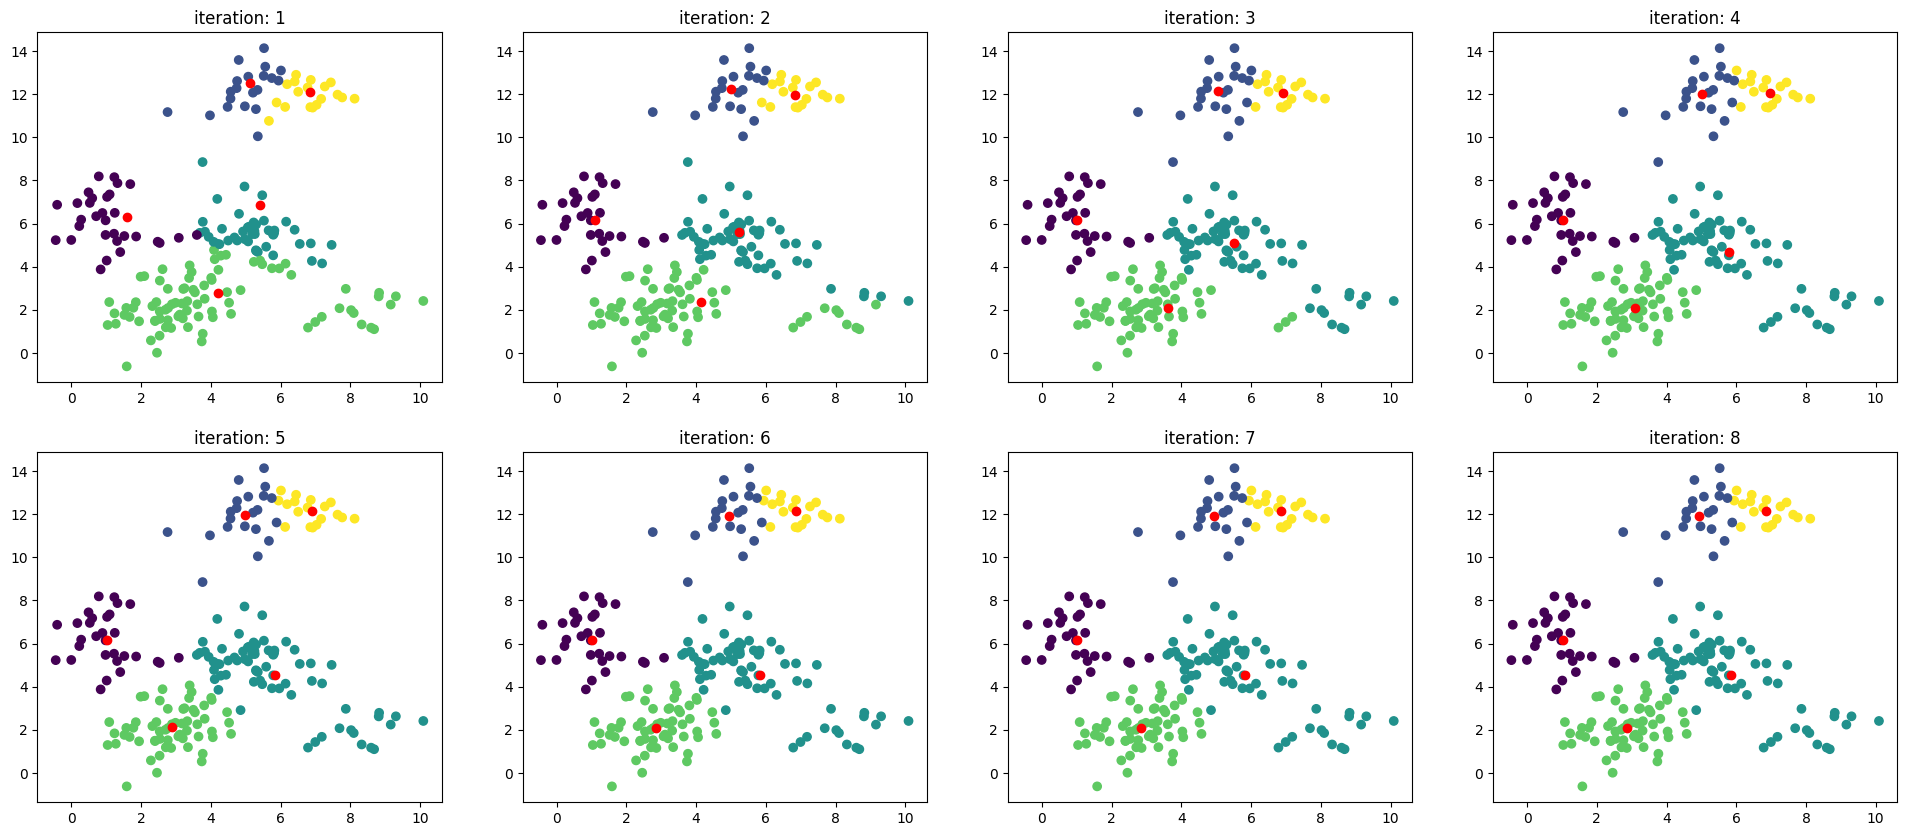

In [4]:
iterations = [1,2,3,4,5,6,7,8]
fig , ax = plt.subplots(ncols=4, nrows=2, figsize=(24,10))

for i in iterations:
    kmeans = KMeans(k=5, max_iter=i, random_state=42)
    kmeans.fit(data)
    data['cluster'] = kmeans.predict(data)
    ax[(i-1)//4][(i-1)%4].scatter(x='x', y='y', c='cluster', cmap='viridis', data=data)
    ax[(i-1)//4][(i-1)%4].scatter(kmeans.centroids['x'], kmeans.centroids['y'], color='r', marker='o')
    ax[(i-1)//4][(i-1)%4].set_title(f'iteration: {i}')


final centroids:            x          y   cluster
0  2.335231   3.271994  2.080460
1  8.295690   1.965675  2.000000
2  6.483759   4.494048  2.000000
3  4.749384   5.561403  1.913043
4  5.585597  11.834363  2.268293 iteration:  1
final centroids:            x          y  cluster
0  2.303569   3.145831      0.0
1  8.295690   1.965675      1.0
2  6.117445   4.369070      2.0
3  4.325878   5.862346      3.0
4  5.874416  12.105610      4.0 iteration:  2
final centroids:            x          y  cluster
0  2.431821   2.786029      0.0
1  8.295690   1.965675      1.0
2  5.896158   4.650890      2.0
3  3.570438   6.097497      3.0
4  5.874416  12.105610      4.0 iteration:  3
final centroids:            x          y  cluster
0  2.676060   2.308006      0.0
1  8.295690   1.965675      1.0
2  5.549053   4.955669      2.0
3  2.380017   6.291034      3.0
4  5.874416  12.105610      4.0 iteration:  4
final centroids:            x          y  cluster
0  2.821736   2.137870      0.0
1  8.295690   1.

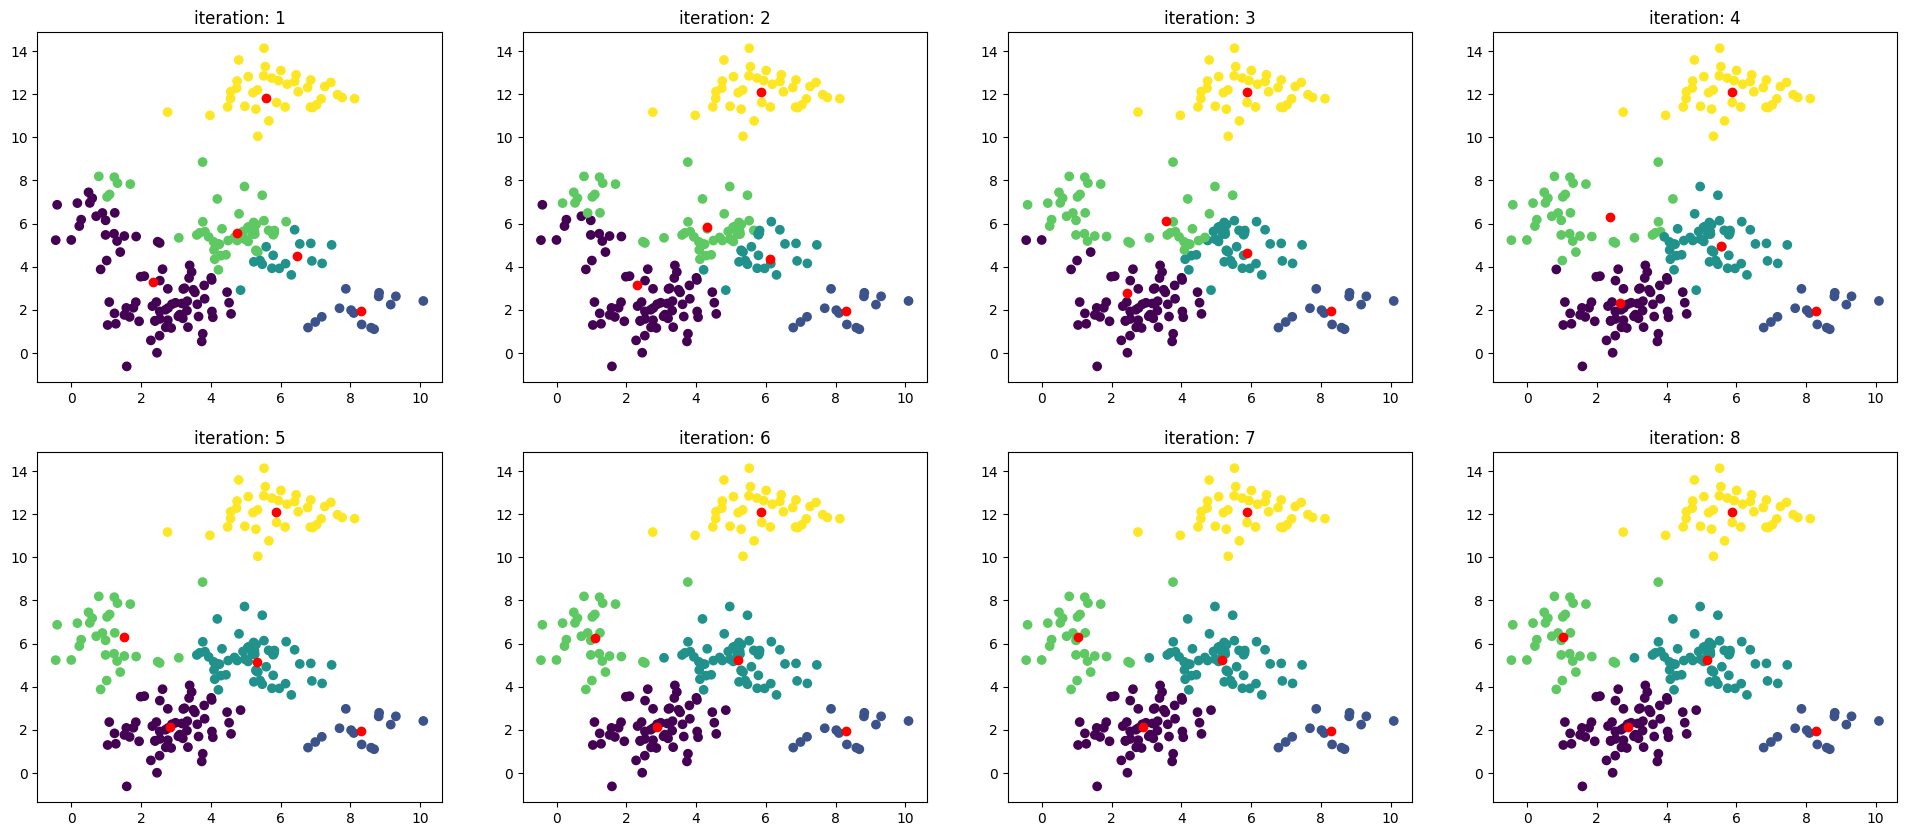

In [5]:
iterations = [1,2,3,4,5,6,7,8]
fig , ax = plt.subplots(ncols=4, nrows=2, figsize=(24,10))

for i in iterations:
    kmeans = KMeans(k=5, max_iter=i, random_state=2)
    kmeans.fit(data)
    data['cluster'] = kmeans.predict(data)
    ax[(i-1)//4][(i-1)%4].scatter(x='x', y='y', c='cluster', cmap='viridis', data=data)
    ax[(i-1)//4][(i-1)%4].scatter(kmeans.centroids['x'], kmeans.centroids['y'], color='r', marker='o')
    ax[(i-1)//4][(i-1)%4].set_title(f'iteration: {i}')

We see that choosing initial centroids randomly results in incorrect clustering. I will implement different methods for calculating centroids.